# Data Preparation and Clustering

In [211]:
#%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

hr_dataset = pd.read_csv("HR_comma_sep.csv")

In [212]:
departments = sorted(hr_dataset['sales'].unique())
dept_mapping = dict(zip(departments, range(0, len(departments) + 1)))
dept_mapping

{'IT': 0,
 'RandD': 1,
 'accounting': 2,
 'hr': 3,
 'management': 4,
 'marketing': 5,
 'product_mng': 6,
 'sales': 7,
 'support': 8,
 'technical': 9}

In [213]:
salary_levels = list(hr_dataset['salary'].unique())
salary_mapping = dict(zip(salary_levels, range(0, len(salary_levels) + 1)))
salary_mapping

{'high': 2, 'low': 0, 'medium': 1}

In [214]:
hr_dataset['dept'] = hr_dataset['sales'].map(dept_mapping).astype(int)
hr_dataset['salary_level'] = hr_dataset['salary'].map(salary_mapping).astype(int)

hr_dataset.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,dept,salary_level
14994,0.40,0.57,2,151,3,0,1,0,support,low,8,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,8,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,8,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,8,0
14998,0.37,0.52,2,158,3,0,1,0,support,low,8,0


In [215]:
hr_dataset = hr_dataset.drop(['sales', 'salary', 'dept'], axis=1)
hr_dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_level
0,0.38,0.53,2,157,3,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1
2,0.11,0.88,7,272,4,0,1,0,1
3,0.72,0.87,5,223,5,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0


In [216]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

min_max_scaler = preprocessing.MinMaxScaler()
for k in hr_dataset.columns:
    hr_dataset[k] = min_max_scaler.fit_transform(hr_dataset[[k]].values.astype(float))

In [217]:
hr_dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_level
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.5
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.5
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.0


In [218]:
hr_dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_level
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.574542,0.556409,0.360611,0.490889,0.187279,0.144610,0.238083,0.021268,0.297353
std,0.273220,0.267452,0.246518,0.233379,0.182517,0.351719,0.425924,0.144281,0.318591
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.384615,0.312500,0.200000,0.280374,0.125000,0.000000,0.000000,0.000000,0.000000
50%,0.604396,0.562500,0.400000,0.485981,0.125000,0.000000,0.000000,0.000000,0.500000
75%,0.802198,0.796875,0.600000,0.696262,0.250000,0.000000,0.000000,0.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [219]:
hr_dataset.to_csv("preprocessed_dataset.csv", index=False)

In [220]:
hr_dataset = hr_dataset.drop(['Work_accident', 'left', 'promotion_last_5years', 'salary_level'], axis=1)
hr_dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.318681,0.265625,0.0,0.285047,0.125
1,0.780220,0.781250,0.6,0.775701,0.500
2,0.021978,0.812500,1.0,0.822430,0.250
3,0.692308,0.796875,0.6,0.593458,0.375
4,0.307692,0.250000,0.0,0.294393,0.125


In [221]:
hr_dataset.to_csv("preprocessed_dataset.csv", index=False)

In [222]:
train_data = hr_dataset.values
train_data

array([[ 0.31868132,  0.265625  ,  0.        ,  0.28504673,  0.125     ],
       [ 0.78021978,  0.78125   ,  0.6       ,  0.77570093,  0.5       ],
       [ 0.02197802,  0.8125    ,  1.        ,  0.82242991,  0.25      ],
       ..., 
       [ 0.30769231,  0.265625  ,  0.        ,  0.21962617,  0.125     ],
       [ 0.02197802,  0.9375    ,  0.8       ,  0.85981308,  0.25      ],
       [ 0.30769231,  0.25      ,  0.        ,  0.28971963,  0.125     ]])

In [223]:
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# KMEANS

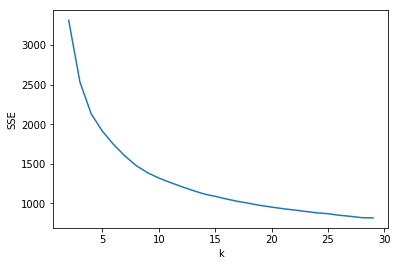

In [224]:
sse_list = list()
max_k = 30
#plt.figure((12,6))
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(train_data)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(range(2,max_k), sse_list)
plt.show()

In [225]:
kmeans = KMeans(n_clusters = 10)
kmeans.fit(train_data)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print 'centers', kmeans.cluster_centers_
print 'labels', dict(zip(bins, hist))
print 'sse', kmeans.inertia_
print 'silhouette', silhouette_score(train_data, kmeans.labels_)

centers [[ 0.69192502  0.80502757  0.34962275  0.2878483   0.11992165]
 [ 0.19571786  0.43858726  0.57351291  0.41068001  0.29741863]
 [ 0.3690397   0.25713973  0.04878451  0.24369149  0.13195303]
 [ 0.47909933  0.7658371   0.31251885  0.63801962  0.12999623]
 [ 0.69287358  0.3416963   0.35429132  0.67855555  0.11721432]
 [ 0.79321033  0.85269755  0.54358611  0.68675361  0.34186747]
 [ 0.66600679  0.54581227  0.31948529  0.46947155  0.78538603]
 [ 0.04048687  0.78546805  0.81309417  0.81980638  0.27387892]
 [ 0.751436    0.37704559  0.39014493  0.31289223  0.12155797]
 [ 0.84317403  0.73990236  0.26510668  0.61512115  0.09575017]]
labels {0: 1726, 1: 891, 2: 2427, 3: 1326, 4: 2039, 5: 1413, 6: 542, 7: 1115, 8: 2070, 9: 1450}
sse 1321.56027471
silhouette 0.267768571261


In [226]:
hr_dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.318681,0.265625,0.0,0.285047,0.125
1,0.780220,0.781250,0.6,0.775701,0.500
2,0.021978,0.812500,1.0,0.822430,0.250
3,0.692308,0.796875,0.6,0.593458,0.375
4,0.307692,0.250000,0.0,0.294393,0.125


In [227]:
hr_dataset_temp = pd.read_csv("HR_comma_sep.csv")
hr_dataset_temp['label_kmeans'] = kmeans.labels_
hr_dataset_temp.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,label_kmeans
0,0.38,0.53,2,157,3,0,1,0,sales,low,2
1,0.80,0.86,5,262,6,0,1,0,sales,medium,5
2,0.11,0.88,7,272,4,0,1,0,sales,medium,7
3,0.72,0.87,5,223,5,0,1,0,sales,low,5
4,0.37,0.52,2,159,3,0,1,0,sales,low,2


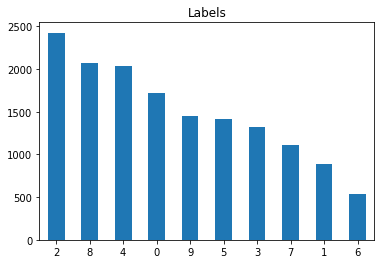

In [228]:
hr_dataset_temp['label_kmeans'].value_counts().plot(kind='bar', title='Labels')
plt.xticks(rotation=0)
plt.show()

In [229]:
len(kmeans.cluster_centers_)

10

In [230]:
hr_dataset_temp[hr_dataset_temp['label_kmeans']==2].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,label_kmeans
count,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.0
mean,0.425826,0.524569,2.243923,148.149979,3.055624,0.093119,0.631644,0.015657,2.0
std,0.084461,0.075090,0.470742,22.555980,0.721102,0.290659,0.482458,0.124171,0.0
min,0.100000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,2.0
25%,0.380000,0.480000,2.000000,135.000000,3.000000,0.000000,0.000000,0.000000,2.0
50%,0.420000,0.520000,2.000000,146.000000,3.000000,0.000000,1.000000,0.000000,2.0
75%,0.450000,0.560000,2.000000,157.000000,3.000000,0.000000,1.000000,0.000000,2.0
max,0.760000,0.850000,4.000000,267.000000,8.000000,1.000000,1.000000,1.000000,2.0


In [231]:
hr_dataset_temp[hr_dataset_temp['label_kmeans']==4].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,label_kmeans
count,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.0
mean,0.720515,0.578686,3.771457,241.210888,2.937715,0.158901,0.026484,0.022070,4.0
std,0.147379,0.077642,0.874763,23.066862,0.897355,0.365674,0.160608,0.146946,0.0
min,0.260000,0.360000,2.000000,191.000000,2.000000,0.000000,0.000000,0.000000,4.0
25%,0.610000,0.520000,3.000000,222.500000,2.000000,0.000000,0.000000,0.000000,4.0
50%,0.720000,0.580000,4.000000,242.000000,3.000000,0.000000,0.000000,0.000000,4.0
75%,0.840000,0.640000,4.000000,260.000000,3.000000,0.000000,0.000000,0.000000,4.0
max,1.000000,0.750000,7.000000,310.000000,6.000000,1.000000,1.000000,1.000000,4.0


In [232]:
hr_dataset_temp[hr_dataset_temp['label_kmeans']==3].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,label_kmeans
count,1326.00000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.0
mean,0.52598,0.850136,3.562594,232.536199,3.039970,0.179487,0.039970,0.018854,3.0
std,0.12577,0.089340,0.805783,27.889157,0.978594,0.383905,0.195962,0.136060,0.0
min,0.09000,0.600000,2.000000,149.000000,2.000000,0.000000,0.000000,0.000000,3.0
25%,0.50000,0.770000,3.000000,210.250000,2.000000,0.000000,0.000000,0.000000,3.0
50%,0.55000,0.850000,4.000000,234.000000,3.000000,0.000000,0.000000,0.000000,3.0
75%,0.61000,0.930000,4.000000,256.000000,3.000000,0.000000,0.000000,0.000000,3.0
max,0.71000,1.000000,5.000000,301.000000,7.000000,1.000000,1.000000,1.000000,3.0


In [233]:
hr_dataset_temp[hr_dataset_temp['label_kmeans']==9].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,label_kmeans
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.0
mean,0.857124,0.833552,3.326207,227.760000,2.766897,0.171724,0.015862,0.021379,9.0
std,0.090770,0.087980,0.690418,26.751012,0.730491,0.377271,0.124985,0.144695,0.0
min,0.660000,0.620000,2.000000,163.000000,2.000000,0.000000,0.000000,0.000000,9.0
25%,0.780000,0.760000,3.000000,207.000000,2.000000,0.000000,0.000000,0.000000,9.0
50%,0.860000,0.830000,3.000000,226.000000,3.000000,0.000000,0.000000,0.000000,9.0
75%,0.940000,0.910000,4.000000,249.750000,3.000000,0.000000,0.000000,0.000000,9.0
max,1.000000,1.000000,5.000000,310.000000,6.000000,1.000000,1.000000,1.000000,9.0


In [234]:
hr_dataset_temp[hr_dataset_temp['label_kmeans']==1].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,label_kmeans
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0
mean,0.268103,0.640696,4.867565,183.885522,4.379349,0.173962,0.074074,0.020202,1.0
std,0.122721,0.145542,0.918213,44.081313,1.360676,0.379290,0.262038,0.140770,0.0
min,0.100000,0.360000,3.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.0
25%,0.170000,0.530000,4.000000,151.000000,3.000000,0.000000,0.000000,0.000000,1.0
50%,0.230000,0.630000,5.000000,180.000000,4.000000,0.000000,0.000000,0.000000,1.0
75%,0.340000,0.750000,6.000000,215.000000,5.000000,0.000000,0.000000,0.000000,1.0
max,0.660000,1.000000,7.000000,287.000000,10.000000,1.000000,1.000000,1.000000,1.0


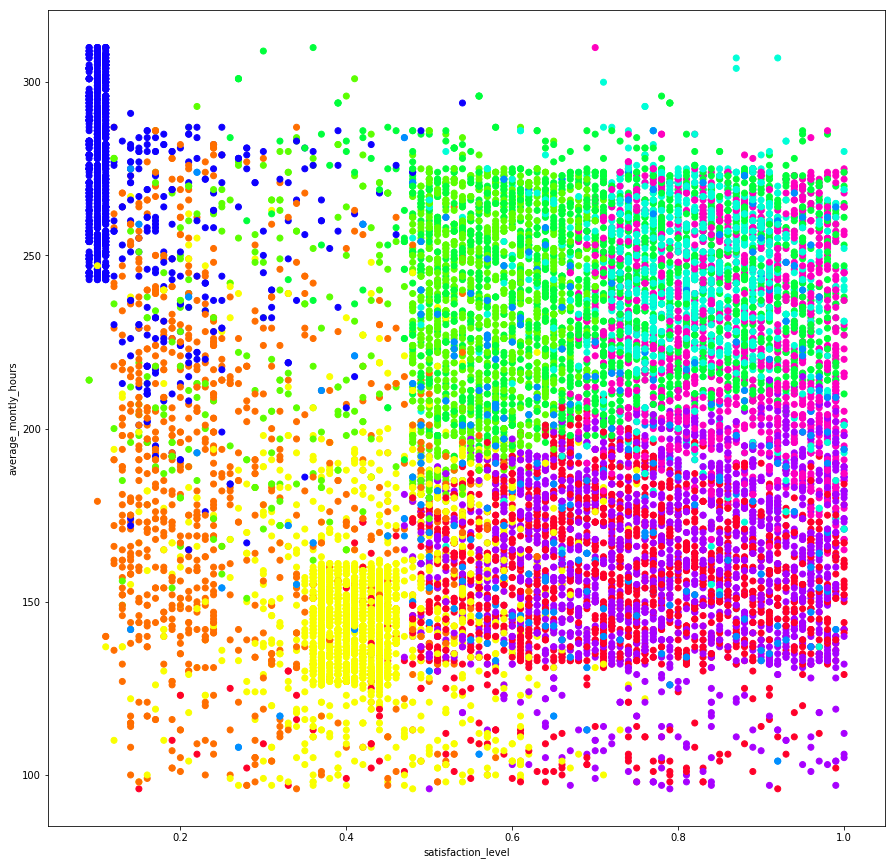

In [235]:
plt.figure(figsize=(15, 15)) 
plt.scatter(x=hr_dataset_temp['satisfaction_level'], y=hr_dataset_temp['average_montly_hours'], 
            c=hr_dataset_temp['label_kmeans'], cmap='gist_rainbow')
plt.xlabel('satisfaction_level')
plt.ylabel('average_montly_hours')
#plt.legend()
plt.show()

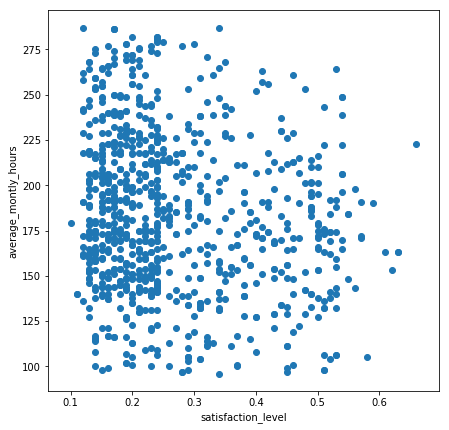

In [236]:
hr_c = hr_dataset_temp[hr_dataset_temp['label_kmeans']==1]
plt.figure(figsize=(7, 7))
plt.scatter(x=hr_c['satisfaction_level'], y=hr_c['average_montly_hours'])
plt.xlabel('satisfaction_level')
plt.ylabel('average_montly_hours')
#plt.legend()
plt.show()

In [237]:
kmeans.cluster_centers_[0]

array([ 0.69192502,  0.80502757,  0.34962275,  0.2878483 ,  0.11992165])

In [238]:
hr_dataset_temp[hr_dataset_temp['label_kmeans']==0].describe() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,label_kmeans
count,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.0
mean,0.720029,0.875133,3.746813,157.617034,2.958285,0.154693,0.024334,0.019699,0.0
std,0.147363,0.077870,0.859510,21.585339,0.857024,0.361717,0.154128,0.139003,0.0
min,0.150000,0.720000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.0
25%,0.610000,0.810000,3.000000,143.000000,2.000000,0.000000,0.000000,0.000000,0.0
50%,0.720000,0.880000,4.000000,158.000000,3.000000,0.000000,0.000000,0.000000,0.0
75%,0.830000,0.940000,4.000000,173.000000,3.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,6.000000,209.000000,6.000000,1.000000,1.000000,1.000000,0.0


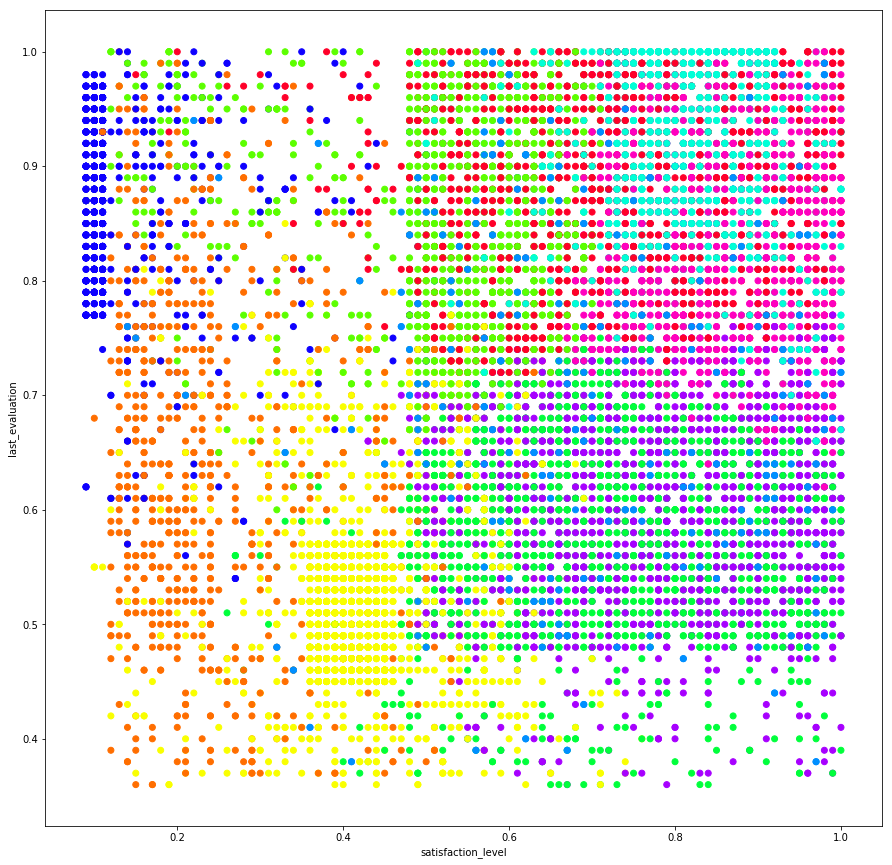

In [239]:
plt.figure(figsize=(15, 15))
plt.scatter(x=hr_dataset_temp['satisfaction_level'], y=hr_dataset_temp['last_evaluation'], 
            c=hr_dataset_temp['label_kmeans'], cmap='gist_rainbow')
plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')
#plt.legend()
plt.show()

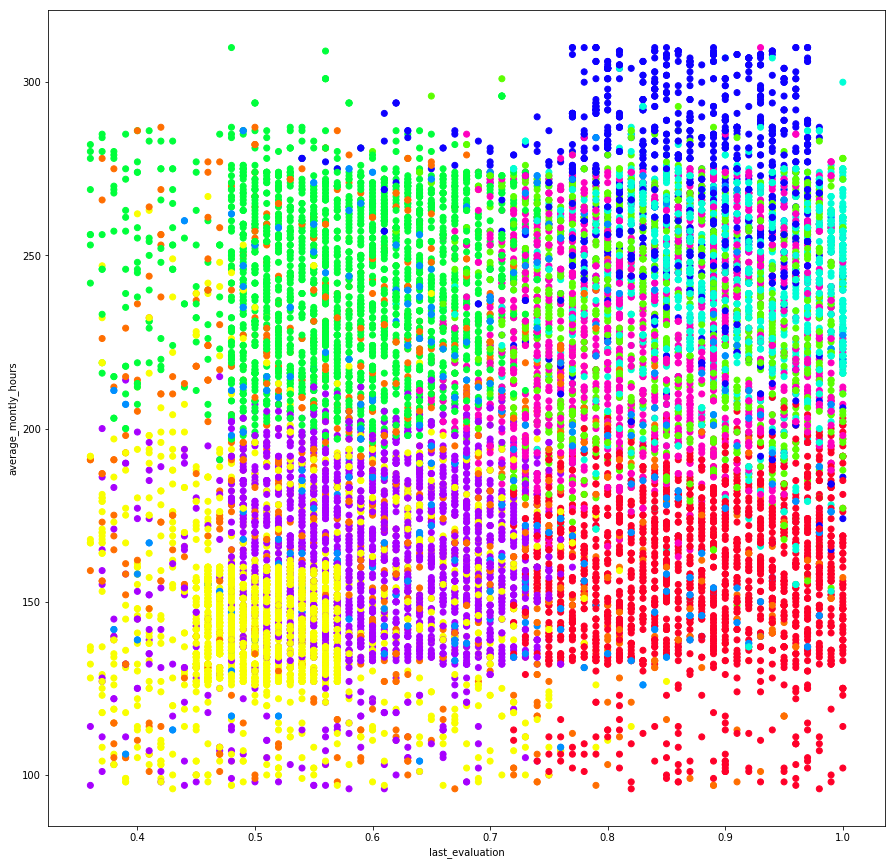

In [240]:
plt.figure(figsize=(15, 15))
plt.scatter(x=hr_dataset_temp['last_evaluation'], y=hr_dataset_temp['average_montly_hours'], 
            c=hr_dataset_temp['label_kmeans'], cmap='gist_rainbow')
plt.xlabel('last_evaluation')
plt.ylabel('average_montly_hours')
#plt.legend()
plt.show()

# DBSCAN

In [241]:
dbscan = DBSCAN(eps=0.14, min_samples=4, metric='euclidean')
dbscan.fit(train_data)

hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
print 'labels', dict(zip(bins, hist))
print 'silhouette', silhouette_score(train_data, dbscan.labels_)

labels {0: 2118, 1: 2460, 2: 237, 3: 731, 4: 4001, 5: 3557, 6: 4, 7: 5, 8: 4, 9: 25, 10: 5, 11: 5, 12: 4, 13: 5, 14: 6, 15: 11, 16: 9, 17: 16, 18: 32, 19: 6, 20: 4, 21: 6, 22: 4, 23: 14, 24: 14, 25: 5, 26: 5, 27: 4, 28: 4, 29: 9, 30: 3, 31: 12, 32: 4, 33: 4, 34: 8, 35: 5, 36: 4, 37: 6, 38: 4, 39: 5, 40: 8, 41: 4, 42: 8, 43: 5, 44: 5, 45: 4, 46: 5, 47: 5, 48: 5, 49: 4, 50: 6, 51: 8, 52: 4, 53: 6, 54: 4, 55: 4, 56: 7, 57: 4, 58: 6, 59: 4, 60: 4, 61: 5, 62: 4, 63: 3, 64: 4, 65: 7, 66: 5, 67: 4, 68: 5, 69: 4, 70: 4, 71: 4, 72: 12, 73: 4, 74: 4, 75: 4, 76: 8, 77: 4, 78: 4, 79: 4, 80: 5, 81: 6, 82: 10, 83: 4, 84: 5, 85: 4, 86: 4, 87: 4, 88: 4, 89: 6, 90: 4, 91: 6, 92: 10, 93: 4, 94: 8, 95: 6, 96: 5, 97: 4, 98: 6, 99: 4, 100: 10, 101: 4, 102: 4, 103: 4, 104: 4, 105: 4, 106: 4, 107: 4, 108: 8, 109: 4, 110: 6, 111: 4, 112: 4, 113: 4, 114: 4, 115: 4, 116: 6, 117: 4, 118: 6, 119: 4, 120: 4, 121: 0, -1: 1222}
silhouette -0.159666951722


In [242]:
len(train_data)

14999

In [243]:
hr_dataset_temp = pd.read_csv("HR_comma_sep.csv")
hr_dataset_temp['label_dbscan'] = dbscan.labels_
hr_dataset_temp.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,label_dbscan
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,0


In [244]:
hr_dataset_temp["label_dbscan"].unique()

array([  0,   1,   2,   3,   4,   5,   6,  -1,   7,   8,   9,  10,  11,
        12,  13,  32,  18,  14,  30,  19,  15,  59,  16,  69,  17,  20,
        21,  52,  22,  49,  37,  23,  24,  41,  25,  26,  27,  61,  28,
        56,  29,  62,  31,  33,  34,  53,  35,  42,  66,  36,  38,  39,
        40,  43,  44,  45,  46,  54,  51,  74,  67, 120,  47,  64,  48,
        84,  68,  57,  50,  65,  55, 103,  80,  58,  60,  96,  63,  70,
        71,  72,  73,  75,  76,  77,  78,  79,  81,  82,  83,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  97,  98,  99, 100,
       101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119])

In [245]:
hr_dataset_temp[hr_dataset_temp['label_dbscan']==0].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,label_dbscan
count,2118.000000,2118.000000,2118.0,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.0
mean,0.467861,0.556067,2.0,156.323890,2.952786,0.079792,0.727573,0.009915,0.0
std,0.139572,0.118501,0.0,33.376114,0.387133,0.271035,0.445313,0.099103,0.0
min,0.200000,0.360000,2.0,98.000000,2.000000,0.000000,0.000000,0.000000,0.0
25%,0.390000,0.480000,2.0,136.000000,3.000000,0.000000,0.000000,0.000000,0.0
50%,0.420000,0.520000,2.0,148.000000,3.000000,0.000000,1.000000,0.000000,0.0
75%,0.460000,0.570000,2.0,158.000000,3.000000,0.000000,1.000000,0.000000,0.0
max,1.000000,1.000000,2.0,286.000000,5.000000,1.000000,1.000000,1.000000,0.0


In [246]:
hr_dataset_temp[hr_dataset_temp['label_dbscan']==1].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,label_dbscan
count,2460.000000,2460.000000,2460.0,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.0
mean,0.694553,0.776797,5.0,214.736992,3.601626,0.138618,0.242683,0.015447,1.0
std,0.226009,0.155791,0.0,42.880623,1.235834,0.345618,0.428792,0.123348,0.0
min,0.090000,0.380000,5.0,101.000000,2.000000,0.000000,0.000000,0.000000,1.0
25%,0.580000,0.640000,5.0,179.000000,3.000000,0.000000,0.000000,0.000000,1.0
50%,0.750000,0.810000,5.0,224.000000,3.000000,0.000000,0.000000,0.000000,1.0
75%,0.860000,0.910000,5.0,250.000000,5.000000,0.000000,0.000000,0.000000,1.0
max,1.000000,1.000000,5.0,307.000000,7.000000,1.000000,1.000000,1.000000,1.0


In [247]:
hr_dataset_temp[hr_dataset_temp['label_dbscan']==3].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,label_dbscan
count,731.000000,731.000000,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.0
mean,0.120274,0.852394,6.0,267.740082,4.157319,0.080711,0.838577,0.009576,3.0
std,0.050550,0.088498,0.0,28.091402,0.542582,0.272578,0.368172,0.097454,0.0
min,0.090000,0.480000,6.0,166.000000,2.000000,0.000000,0.000000,0.000000,3.0
25%,0.100000,0.800000,6.0,251.000000,4.000000,0.000000,1.000000,0.000000,3.0
50%,0.100000,0.860000,6.0,269.000000,4.000000,0.000000,1.000000,0.000000,3.0
75%,0.110000,0.920000,6.0,289.500000,4.000000,0.000000,1.000000,0.000000,3.0
max,0.420000,1.000000,6.0,310.000000,6.000000,1.000000,1.000000,1.000000,3.0


In [248]:
hr_dataset_temp[hr_dataset_temp['label_dbscan']==4].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,label_dbscan
count,4001.000000,4001.000000,4001.0,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.0
mean,0.706336,0.743434,4.0,206.316671,3.168958,0.153712,0.099225,0.025744,4.0
std,0.190594,0.161048,0.0,43.605286,1.059927,0.360717,0.299002,0.158389,0.0
min,0.120000,0.360000,4.0,96.000000,2.000000,0.000000,0.000000,0.000000,4.0
25%,0.590000,0.600000,4.0,169.000000,2.000000,0.000000,0.000000,0.000000,4.0
50%,0.730000,0.750000,4.0,209.000000,3.000000,0.000000,0.000000,0.000000,4.0
75%,0.850000,0.880000,4.0,245.000000,4.000000,0.000000,0.000000,0.000000,4.0
max,1.000000,1.000000,4.0,300.000000,7.000000,1.000000,1.000000,1.000000,4.0


In [249]:
hr_dataset_temp[hr_dataset_temp['label_dbscan']==5].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,label_dbscan
count,3557.000000,3557.000000,3557.0,3557.000000,3557.000000,3557.000000,3557.000000,3557.000000,3557.0
mean,0.708608,0.717585,3.0,197.589261,2.850155,0.172055,0.014057,0.016868,5.0
std,0.171259,0.155422,0.0,43.369346,0.787117,0.377481,0.117742,0.128795,0.0
min,0.100000,0.360000,3.0,96.000000,2.000000,0.000000,0.000000,0.000000,5.0
25%,0.580000,0.590000,3.0,162.000000,2.000000,0.000000,0.000000,0.000000,5.0
50%,0.710000,0.710000,3.0,195.000000,3.000000,0.000000,0.000000,0.000000,5.0
75%,0.850000,0.850000,3.0,234.000000,3.000000,0.000000,0.000000,0.000000,5.0
max,1.000000,1.000000,3.0,294.000000,7.000000,1.000000,1.000000,1.000000,5.0


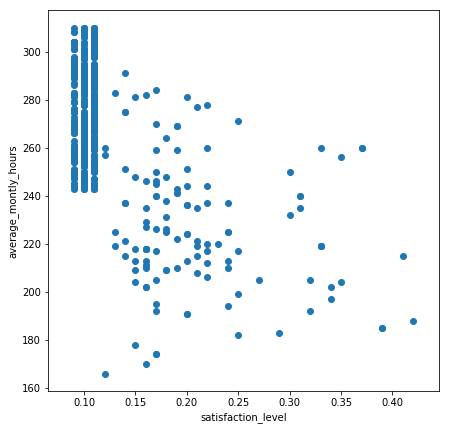

In [250]:
hr_d = hr_dataset_temp[hr_dataset_temp['label_dbscan']==3]
plt.figure(figsize=(7, 7))
plt.scatter(x=hr_d['satisfaction_level'], y=hr_d['average_montly_hours'])
plt.xlabel('satisfaction_level')
plt.ylabel('average_montly_hours')
#plt.legend()
plt.show()

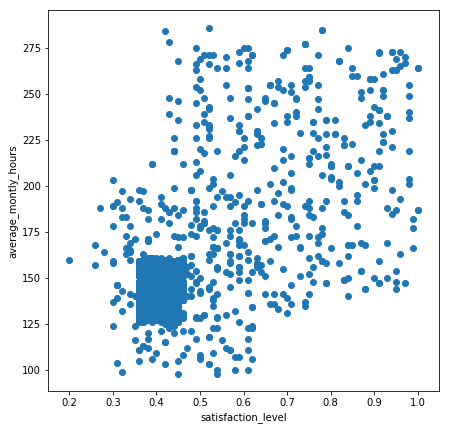

In [251]:
hr_d = hr_dataset_temp[hr_dataset_temp['label_dbscan']==0]
plt.figure(figsize=(7, 7))
plt.scatter(x=hr_d['satisfaction_level'], y=hr_d['average_montly_hours'])
plt.xlabel('satisfaction_level')
plt.ylabel('average_montly_hours')
#plt.legend()
plt.show()

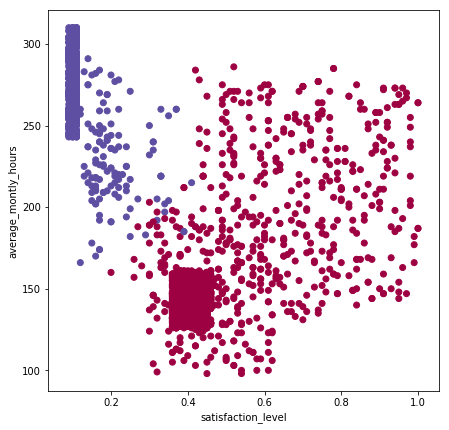

In [252]:
val = (0,3)
hr_x = hr_dataset_temp[hr_dataset_temp['label_dbscan'].isin(val)]
plt.figure(figsize=(7, 7))
plt.scatter(x=hr_x['satisfaction_level'], y=hr_x['average_montly_hours'], c=hr_x['label_dbscan'], cmap='Spectral')
plt.xlabel('satisfaction_level')
plt.ylabel('average_montly_hours')
#plt.legend()
plt.show()

# HIERARCHICAL CLUSTERING

In [139]:
connectivity = kneighbors_graph(train_data, n_neighbors=100, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [140]:
print 'ward, euclidean'

ward = AgglomerativeClustering(n_clusters=10, linkage='ward', affinity='euclidean',
                                   connectivity=connectivity)

#ward = AgglomerativeClustering(n_clusters=10, linkage='ward', affinity='euclidean')

ward.fit(train_data)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print 'labels', dict(zip(bins, hist))
print 'silhouette', silhouette_score(train_data, ward.labels_)

ward, euclidean
labels {0: 2704, 1: 976, 2: 2201, 3: 1045, 4: 1142, 5: 2345, 6: 2014, 7: 426, 8: 1009, 9: 1137}
silhouette 0.217620749002


In [141]:
print 'average linkage, euclidean'
average_linkage = AgglomerativeClustering(n_clusters=10, linkage='average', affinity='euclidean',
                                              connectivity=connectivity)
average_linkage.fit(train_data)

hist, bins = np.histogram(average_linkage.labels_, 
                          bins=range(0, len(set(average_linkage.labels_)) + 1))

print 'labels', dict(zip(bins, hist))
print 'silhouette', silhouette_score(train_data, average_linkage.labels_)

average linkage, euclidean
labels {0: 14944, 1: 10, 2: 8, 3: 4, 4: 8, 5: 4, 6: 10, 7: 3, 8: 2, 9: 6}
silhouette 0.110228768093


In [142]:
print 'complete linkage, euclidean'
complete_linkage = AgglomerativeClustering(n_clusters=10, linkage='complete', affinity='euclidean',
                                              connectivity=connectivity)
complete_linkage.fit(train_data)
hist, bins = np.histogram(complete_linkage.labels_, 
                          bins=range(0, len(set(complete_linkage.labels_)) + 1))

print 'labels', dict(zip(bins, hist))
print 'silhouette', silhouette_score(train_data, complete_linkage.labels_)

complete linkage, euclidean
labels {0: 8, 1: 7218, 2: 10, 3: 3892, 4: 6, 5: 671, 6: 10, 7: 2, 8: 3178, 9: 4}
silhouette -0.0284129528796


In [143]:
print 'average linkage, manhattan'
average_linkage = AgglomerativeClustering(n_clusters=10, linkage='average', affinity='manhattan',
                                              connectivity=connectivity)
average_linkage.fit(train_data)

hist, bins = np.histogram(average_linkage.labels_, 
                          bins=range(0, len(set(average_linkage.labels_)) + 1))

print 'labels', dict(zip(bins, hist))
print 'silhouette', silhouette_score(train_data, average_linkage.labels_)

average linkage, manhattan
labels {0: 14760, 1: 166, 2: 8, 3: 10, 4: 26, 5: 3, 6: 10, 7: 4, 8: 4, 9: 8}
silhouette 0.11334355965


In [144]:
print 'complete linkage, manhattan'
complete_linkage = AgglomerativeClustering(n_clusters=10, linkage='complete', affinity='manhattan',
                                              connectivity=connectivity)
complete_linkage.fit(train_data)
hist, bins = np.histogram(complete_linkage.labels_, 
                          bins=range(0, len(set(complete_linkage.labels_)) + 1))

print 'labels', dict(zip(bins, hist))
print 'silhouette', silhouette_score(train_data, complete_linkage.labels_)

complete linkage, manhattan
labels {0: 5861, 1: 1585, 2: 826, 3: 2741, 4: 475, 5: 508, 6: 1070, 7: 4, 8: 644, 9: 1285}
silhouette -0.050062616542


In [145]:
len(set(average_linkage.labels_))

10

In [146]:
#Z = linkage(train_data, 'ward')

In [147]:
# calculate full dendrogram
#plt.figure(figsize=(25, 10))
#plt.title('Hierarchical Clustering Dendrogram')
#plt.xlabel('sample index')
#plt.ylabel('distance')
#dendrogram(
#    Z,
#    leaf_rotation=90.,  # rotates the x axis labels
#    leaf_font_size=8.,  # font size for the x axis labels
#)
#plt.show()

In [148]:
hr_dataset_hc = hr_dataset.copy()
hr_dataset_hc['label_hc'] = ward.labels_
hr_dataset_hc.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,label_hc
0,0.318681,0.265625,0.0,0.285047,0.125,5
1,0.780220,0.781250,0.6,0.775701,0.500,8
2,0.021978,0.812500,1.0,0.822430,0.250,9
3,0.692308,0.796875,0.6,0.593458,0.375,8
4,0.307692,0.250000,0.0,0.294393,0.125,5


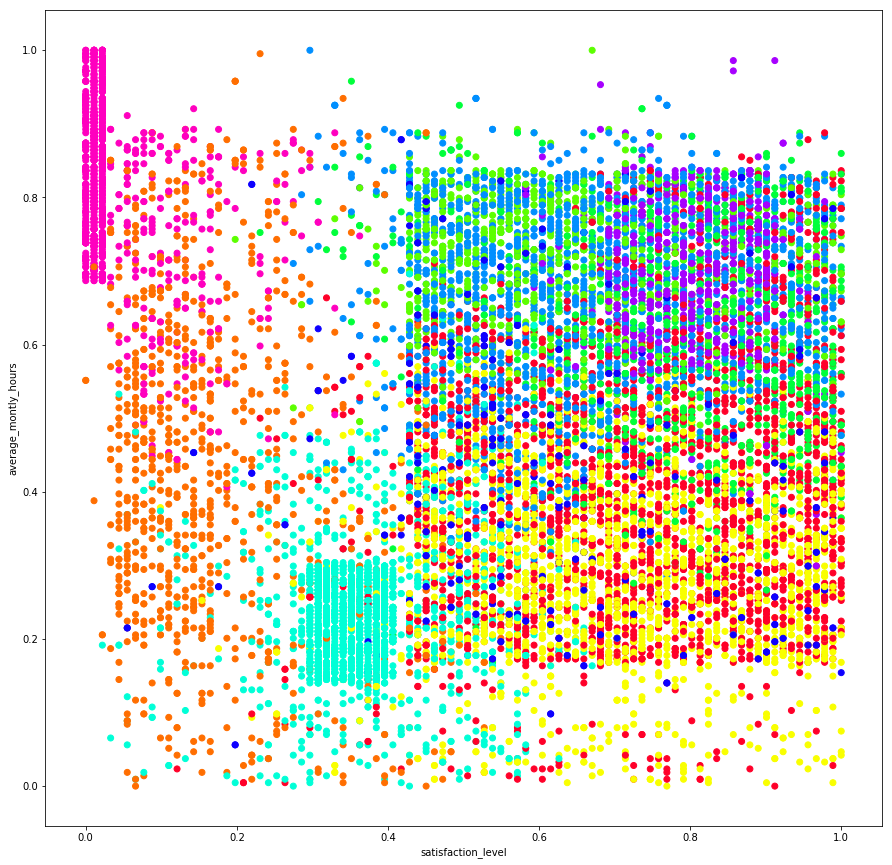

In [149]:
plt.figure(figsize=(15, 15))
plt.scatter(x=hr_dataset_hc['satisfaction_level'], y=hr_dataset_hc['average_montly_hours'], 
            c=hr_dataset_hc['label_hc'], cmap='gist_rainbow')
plt.xlabel('satisfaction_level')
plt.ylabel('average_montly_hours')
plt.show()

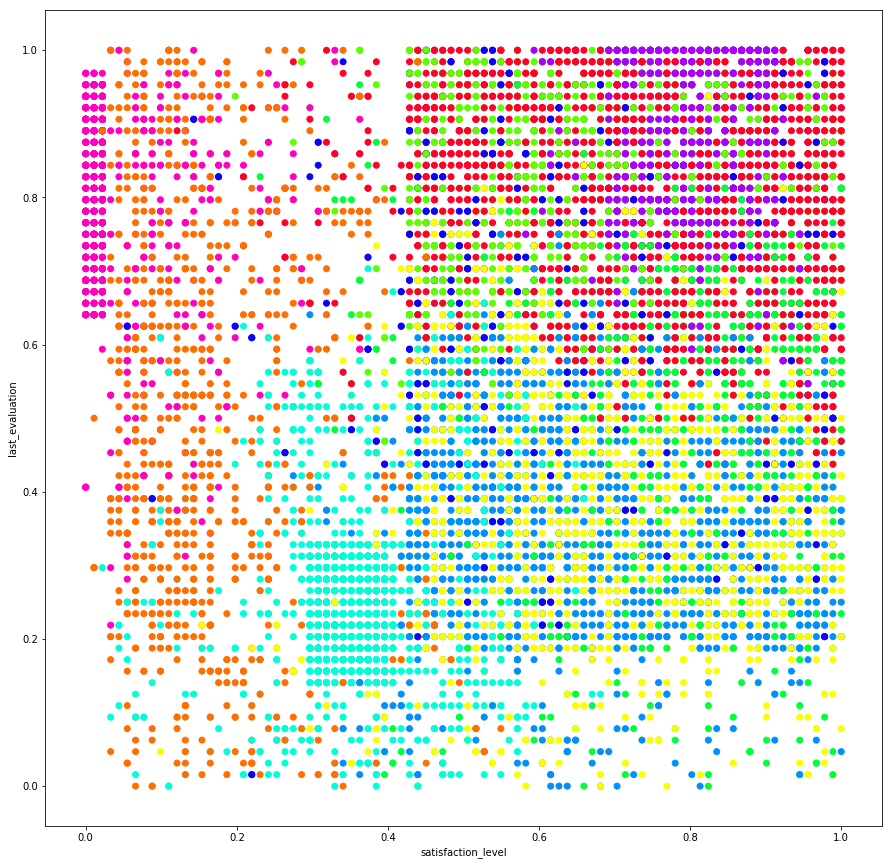

In [193]:
plt.figure(figsize=(15, 15))
plt.scatter(x=hr_dataset_hc['satisfaction_level'], y=hr_dataset_hc['last_evaluation'], 
            c=hr_dataset_hc['label_hc'], cmap='gist_rainbow')
plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')
plt.show()

In [94]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [116]:
sampled_hr_dataset = hr_dataset.copy()
sampled_hr_dataset = sampled_hr_dataset.sample(frac=0.10)
sampled_hr_dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.579245,0.554188,0.363067,0.485748,0.183500
std,0.272385,0.268976,0.244368,0.234346,0.177585
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.384615,0.312500,0.200000,0.271028,0.125000
50%,0.615385,0.562500,0.400000,0.481308,0.125000
75%,0.802198,0.781250,0.600000,0.696262,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [117]:
hr_dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.574542,0.556409,0.360611,0.490889,0.187279
std,0.273220,0.267452,0.246518,0.233379,0.182517
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.384615,0.312500,0.200000,0.280374,0.125000
50%,0.604396,0.562500,0.400000,0.485981,0.125000
75%,0.802198,0.796875,0.600000,0.696262,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
sampled_train_data = sampled_hr_dataset.values
sampled_train_data

array([[ 0.7032967 ,  0.734375  ,  0.4       ,  0.81308411,  0.        ],
       [ 0.86813187,  0.703125  ,  0.4       ,  0.38785047,  0.125     ],
       [ 0.45054945,  0.53125   ,  0.4       ,  0.30841121,  0.        ],
       ..., 
       [ 0.6043956 ,  0.453125  ,  0.2       ,  0.39719626,  0.        ],
       [ 0.57142857,  0.5       ,  0.2       ,  0.45327103,  0.        ],
       [ 0.56043956,  0.765625  ,  0.2       ,  0.52803738,  0.        ]])

In [119]:
sampled_hr_dataset.to_csv("sampled_dataset.csv", index=False)